## import

In [50]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv, GATConv
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from torch.nn import Linear
import torch.nn.functional as F

## 准备数据

In [51]:
dataset = Planetoid(root='../datasets/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}')
print('=' * 10)
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]

print()
print(data)

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora()
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Training node label rate: 0.05
Contains isolated nodes: False
Is undirected: True


## 可视化节点表征分布

In [52]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap='Set2')
    plt.show()

## MLP
### 结构

In [53]:
class MLP(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, num_classes, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.linear1 = Linear(input_channels, hidden_channels)
        self.linear2 = Linear(hidden_channels, num_classes)
    
    def forward(self, x):
        x = torch.nn.ReLU()(self.linear1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.linear2(x)
    

model = MLP(input_channels=dataset.num_features, hidden_channels=64, num_classes=dataset.num_classes)
print(model)

MLP(
  (linear1): Linear(in_features=1433, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=7, bias=True)
)


### 训练

In [54]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


def train(data, model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss


data = data.cuda()
model.cuda()
for epoch in range(1, 201):
    loss = train(data, model, optimizer, criterion)
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}')

Epoch 001, Loss: 1.9497
Epoch 002, Loss: 1.9423
Epoch 003, Loss: 1.9364
Epoch 004, Loss: 1.9274
Epoch 005, Loss: 1.9142
Epoch 006, Loss: 1.8996
Epoch 007, Loss: 1.8841
Epoch 008, Loss: 1.8698
Epoch 009, Loss: 1.8481
Epoch 010, Loss: 1.8210
Epoch 011, Loss: 1.7966
Epoch 012, Loss: 1.7628
Epoch 013, Loss: 1.7389
Epoch 014, Loss: 1.7109
Epoch 015, Loss: 1.6649
Epoch 016, Loss: 1.6397
Epoch 017, Loss: 1.5956
Epoch 018, Loss: 1.5438
Epoch 019, Loss: 1.4968
Epoch 020, Loss: 1.4627
Epoch 021, Loss: 1.4078
Epoch 022, Loss: 1.3589
Epoch 023, Loss: 1.3092
Epoch 024, Loss: 1.2497
Epoch 025, Loss: 1.2091
Epoch 026, Loss: 1.1287
Epoch 027, Loss: 1.0781
Epoch 028, Loss: 1.0465
Epoch 029, Loss: 0.9879
Epoch 030, Loss: 0.9078
Epoch 031, Loss: 0.8626
Epoch 032, Loss: 0.8094
Epoch 033, Loss: 0.7946
Epoch 034, Loss: 0.7295
Epoch 035, Loss: 0.6866
Epoch 036, Loss: 0.6328
Epoch 037, Loss: 0.6202
Epoch 038, Loss: 0.5583
Epoch 039, Loss: 0.5368
Epoch 040, Loss: 0.5241
Epoch 041, Loss: 0.4888
Epoch 042, Loss:

Epoch 068, Loss: 0.2029
Epoch 069, Loss: 0.2228
Epoch 070, Loss: 0.1965
Epoch 071, Loss: 0.2225
Epoch 072, Loss: 0.2074
Epoch 073, Loss: 0.2065
Epoch 074, Loss: 0.2142
Epoch 075, Loss: 0.2005
Epoch 076, Loss: 0.1903
Epoch 077, Loss: 0.1994
Epoch 078, Loss: 0.1875
Epoch 079, Loss: 0.1804
Epoch 080, Loss: 0.1899
Epoch 081, Loss: 0.1936
Epoch 082, Loss: 0.2215
Epoch 083, Loss: 0.1991
Epoch 084, Loss: 0.1849
Epoch 085, Loss: 0.1948
Epoch 086, Loss: 0.1990
Epoch 087, Loss: 0.1867
Epoch 088, Loss: 0.1903
Epoch 089, Loss: 0.1875
Epoch 090, Loss: 0.1873
Epoch 091, Loss: 0.1780
Epoch 092, Loss: 0.1596
Epoch 093, Loss: 0.1829
Epoch 094, Loss: 0.1716
Epoch 095, Loss: 0.1720
Epoch 096, Loss: 0.1823
Epoch 097, Loss: 0.1651
Epoch 098, Loss: 0.1851
Epoch 099, Loss: 0.1905
Epoch 100, Loss: 0.1728
Epoch 101, Loss: 0.1535
Epoch 102, Loss: 0.1668
Epoch 103, Loss: 0.1516
Epoch 104, Loss: 0.1734
Epoch 105, Loss: 0.1864
Epoch 106, Loss: 0.1541
Epoch 107, Loss: 0.1616
Epoch 108, Loss: 0.1627
Epoch 109, Loss:

### 测试

In [55]:
def test(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x)
        pred = out.argmax(dim=1)
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        test_acc = test_correct.sum() / data.test_mask.sum()
        return test_acc


test_acc = test(model, data)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.6070


## GCN
### 结构

In [56]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
    
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)


model = GCN(in_channels=dataset.num_features, hidden_channels=64, num_classes=dataset.num_classes)
model = model.cuda()
print(model)

GCN(
  (conv1): GCNConv(1433, 64)
  (conv2): GCNConv(64, 7)
)


### 未训练节点表征可视化

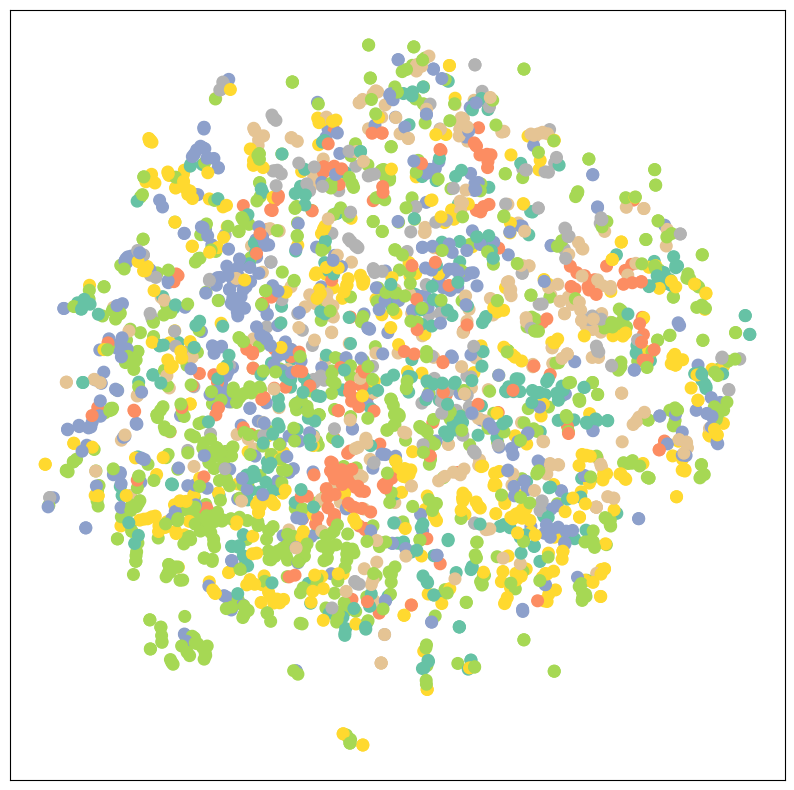

In [57]:
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
visualize(out, color=data.cpu().y)

### 训练

In [58]:
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss


data = data.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
for epoch in range(1, 201):
    loss = train(model, data, optimizer, criterion)
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}')

Epoch 001, Loss: 1.9459
Epoch 002, Loss: 1.9338
Epoch 003, Loss: 1.9173
Epoch 004, Loss: 1.8977
Epoch 005, Loss: 1.8759
Epoch 006, Loss: 1.8546
Epoch 007, Loss: 1.8295
Epoch 008, Loss: 1.8019
Epoch 009, Loss: 1.7773
Epoch 010, Loss: 1.7489
Epoch 011, Loss: 1.7115
Epoch 012, Loss: 1.6781
Epoch 013, Loss: 1.6316
Epoch 014, Loss: 1.6064
Epoch 015, Loss: 1.5634
Epoch 016, Loss: 1.5307
Epoch 017, Loss: 1.4872
Epoch 018, Loss: 1.4472
Epoch 019, Loss: 1.4075
Epoch 020, Loss: 1.3754
Epoch 021, Loss: 1.3145
Epoch 022, Loss: 1.2885
Epoch 023, Loss: 1.2255
Epoch 024, Loss: 1.1930
Epoch 025, Loss: 1.1422
Epoch 026, Loss: 1.1211
Epoch 027, Loss: 1.0478
Epoch 028, Loss: 1.0159
Epoch 029, Loss: 0.9890
Epoch 030, Loss: 0.9384
Epoch 031, Loss: 0.9203
Epoch 032, Loss: 0.8639
Epoch 033, Loss: 0.8506
Epoch 034, Loss: 0.7994
Epoch 035, Loss: 0.7529
Epoch 036, Loss: 0.7274
Epoch 037, Loss: 0.7000
Epoch 038, Loss: 0.6716
Epoch 039, Loss: 0.6473
Epoch 040, Loss: 0.6333
Epoch 041, Loss: 0.6043
Epoch 042, Loss:

### 测试

In [59]:
def test(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        test_acc = test_correct.sum() / data.test_mask.sum()
        return test_acc
    

test_acc = test(model, data)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8080


### 训练后的节点表征可视化

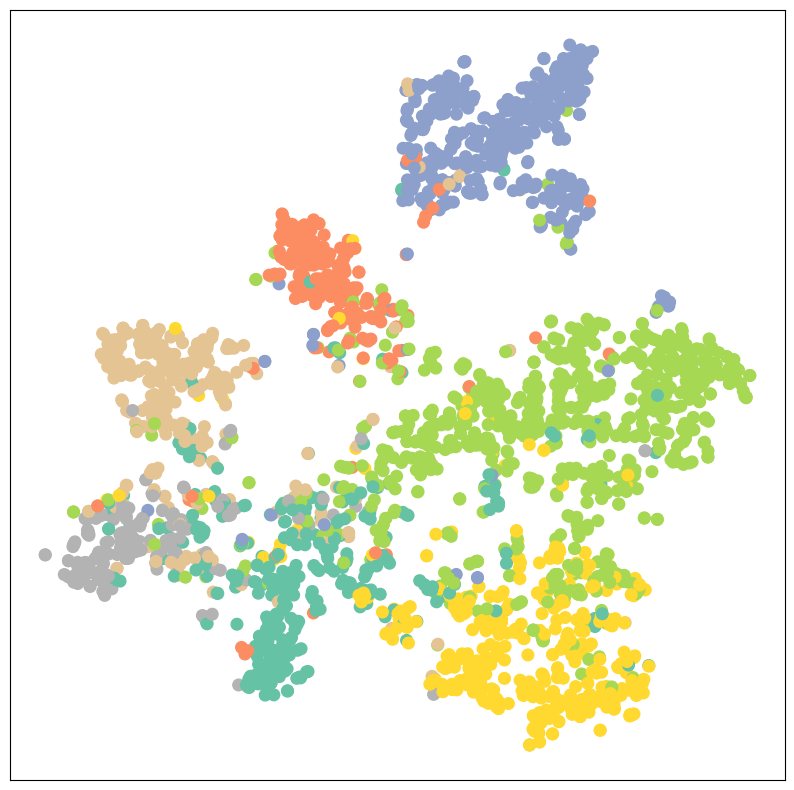

In [60]:
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
visualize(out.cpu(), color=data.cpu().y)

## GAT
### 结构

In [61]:
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv1 = GATConv(in_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, num_classes)
    
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)


model = GAT(in_channels=dataset.num_features, hidden_channels=64, num_classes=dataset.num_classes)
model = model.cuda()
print(model)

GAT(
  (conv1): GATConv(1433, 64, heads=1)
  (conv2): GATConv(64, 7, heads=1)
)


### 训练和测试

In [64]:
data = data.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
for epoch in range(1, 201):
    loss = train(model, data, optimizer, criterion)
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}')

test_acc = test(model, data)
print(f'Test Accuracy: {test_acc:.4f}')

Epoch 001, Loss: 1.9463
Epoch 002, Loss: 1.9361
Epoch 003, Loss: 1.9246
Epoch 004, Loss: 1.9083
Epoch 005, Loss: 1.8897
Epoch 006, Loss: 1.8659
Epoch 007, Loss: 1.8519
Epoch 008, Loss: 1.8254
Epoch 009, Loss: 1.8013
Epoch 010, Loss: 1.7731
Epoch 011, Loss: 1.7352
Epoch 012, Loss: 1.7142
Epoch 013, Loss: 1.6783
Epoch 014, Loss: 1.6498
Epoch 015, Loss: 1.6041
Epoch 016, Loss: 1.5613
Epoch 017, Loss: 1.5299
Epoch 018, Loss: 1.4863
Epoch 019, Loss: 1.4488
Epoch 020, Loss: 1.4186
Epoch 021, Loss: 1.3516
Epoch 022, Loss: 1.3076
Epoch 023, Loss: 1.2661
Epoch 024, Loss: 1.2149
Epoch 025, Loss: 1.1579
Epoch 026, Loss: 1.0951
Epoch 027, Loss: 1.0780
Epoch 028, Loss: 0.9948
Epoch 029, Loss: 0.9462
Epoch 030, Loss: 0.9539
Epoch 031, Loss: 0.8908
Epoch 032, Loss: 0.8202
Epoch 033, Loss: 0.8056
Epoch 034, Loss: 0.7155
Epoch 035, Loss: 0.7078
Epoch 036, Loss: 0.6743
Epoch 037, Loss: 0.6575
Epoch 038, Loss: 0.6239
Epoch 039, Loss: 0.6014
Epoch 040, Loss: 0.5041
Epoch 041, Loss: 0.5276
Epoch 042, Loss:

### 训练后的节点表征可视化

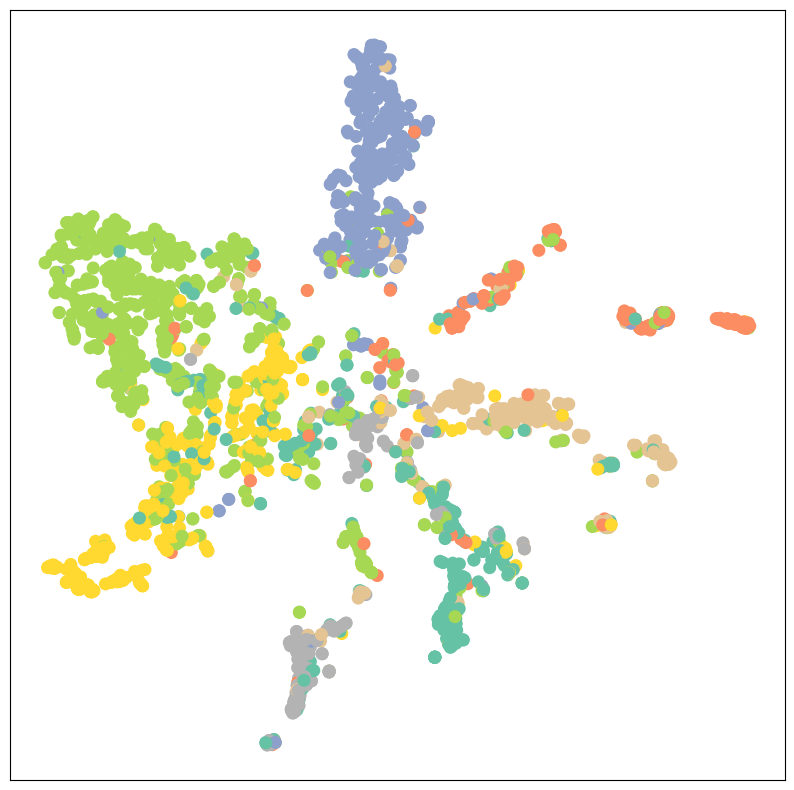

In [65]:
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
visualize(out.cpu(), color=data.cpu().y)